In [1]:
#dependencies
import requests
import os
import pandas as pd
import statistics
from pandas import Series
from matplotlib import pyplot as plt
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
import numpy
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.ar_model import ARResults

In [2]:
data_with_predict_list = []
yhat_list = []   

In [3]:
choice = "../Data/pollution.csv"
state= "AL"

In [4]:
choice_df = pd.read_csv(choice)

In [5]:
choice_df= choice_df.fillna(0)

In [6]:
index = choice_df.Year.unique()
CO = choice_df[choice_df['State']==state]["CO"].values
NO2 = choice_df[choice_df['State']==state]["NO2"].values
Ozone = choice_df[choice_df['State']==state]["Ozone"].values
SO2 = choice_df[choice_df['State']==state]["SO2"].values
Lead = choice_df[choice_df['State']==state]["Lead"].values
PM10 = choice_df[choice_df['State']==state]["PM10"].values
PM2_5 = choice_df[choice_df['State']==state]["PM2.5"].values

In [7]:
pollution = [CO, NO2, Ozone, SO2, Lead, PM10, PM2_5]
prediction_X = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]

1999.0    12.05
2000.0     9.30
2001.0    24.30
2002.0     6.70
2003.0     2.85
dtype: float64
1999.0    0.0
2000.0    0.0
2001.0    0.0
2002.0    0.0
2003.0    0.0
dtype: float64
1999.0    0.088222
2000.0    0.088400
2001.0    0.078917
2002.0    0.081933
2003.0    0.075250
dtype: float64
1999.0    5.200000
2000.0    6.000000
2001.0    3.666667
2002.0    2.500000
2003.0    2.333333
dtype: float64
1999.0    0.0
2000.0    0.0
2001.0    0.0
2002.0    0.0
2003.0    0.0
dtype: float64
1999.0    29.076923
2000.0    25.857143
2001.0    25.083333
2002.0    26.250000
2003.0    28.833333
dtype: float64
1999.0    19.160000
2000.0    17.533333
2001.0    13.918182
2002.0    13.420000
2003.0    14.021429
dtype: float64


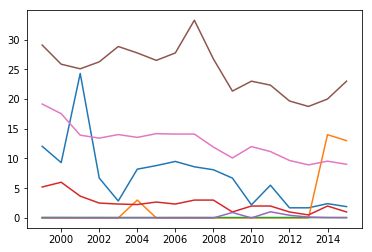

In [8]:
for poll in pollution:
        series = pd.Series(poll, index = index)
        print(series.head())
        series.plot()

In [9]:
def model_plots(series):
    
    # create a difference transform of the dataset
    def difference(dataset):
        diff = list()
        for i in range(1, len(dataset)):
            value = dataset[i] - dataset[i - 1]
            diff.append(value)
        return numpy.array(diff)

    # Make a prediction give regression coefficients and lag obs
    def predict(coef, history):
        yhat = coef[0]
        for i in range(1, len(coef)):
            yhat += coef[i] * history[-i]
        return yhat


    # split dataset
    X = difference(series.values)
    size = int(len(X) * 0.80)
    train, test = X[0:size], X[size:]
    # train autoregression
    model = AR(train)
    model_fit = model.fit(maxlag=3, disp=True)
    window = model_fit.k_ar
    coef = model_fit.params
    # walk forward over time steps in test
    history = [train[i] for i in range(len(train))]
    predictions = list()
    for t in range(len(test)):
        yhat = predict(coef, history)
        obs = test[t]
        predictions.append(yhat)
        history.append(obs)
    error = mean_squared_error(test, predictions)
    print('Test MSE: %.3f' % error)
    # plot
    plt.plot(test)
    plt.plot(predictions, color='red')
    plt.show()

Test MSE: 5.282


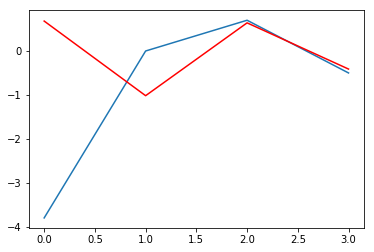

Test MSE: 71.563


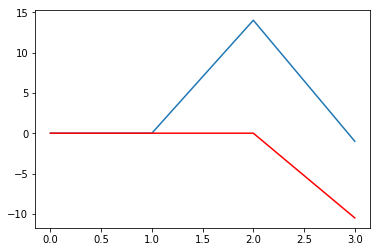

Test MSE: 0.000


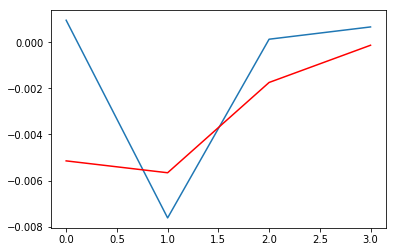

Test MSE: 0.749


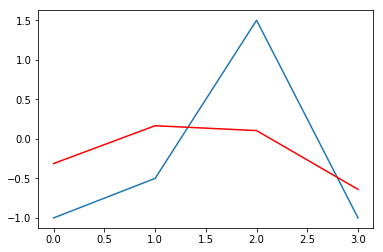

Test MSE: 0.377


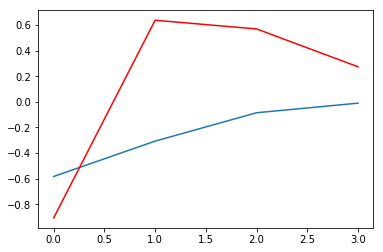

Test MSE: 3.190


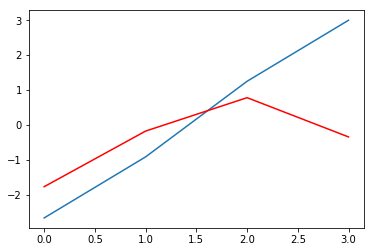

Test MSE: 0.237


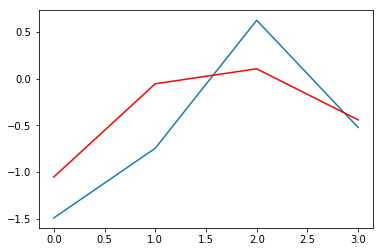

In [10]:
for poll in pollution:
    series = pd.Series(poll, index = index)
    model_plots(series)

In [11]:
def ar_data(series):

    def difference(dataset):
        diff = list()
        for i in range(1, len(dataset)):
            value = dataset[i] - dataset[i - 1]
            diff.append(value)
        return numpy.array(diff)

    # load dataset
    X = difference(series.values)
    # fit model
    model = AR(X)
    model_fit = model.fit(maxlag=3, disp=False)
    # save model to file
    model_fit.save('../Model_Info/ar_model.pkl')
    # save the differenced dataset
    numpy.save('../Model_Info/ar_data.npy', X)
    # save the last ob
    numpy.save('../Model_Info/ar_obs.npy', [series.values[-1]])# load the AR model from file
    loaded = ARResults.load('../Model_Info/ar_model.pkl')
    print(loaded.params)
    data = numpy.load('../Model_Info/ar_data.npy')
    print(data)
    last_ob = numpy.load('../Model_Info/ar_obs.npy')
    print(last_ob)

In [12]:
for poll in pollution:
    series = pd.Series(poll, index = index)
    ar_data(series)

[-0.83652191 -0.15524222 -0.30347622 -0.03560976]
[ -2.75  15.   -17.6   -3.85   5.35   0.6    0.7   -0.9   -0.5   -1.4
  -4.5    3.3   -3.8    0.     0.7   -0.5 ]
[1.9]
[ 1.20653907 -0.19178628 -0.12785752 -0.06392876]
[ 0.  0.  0.  0.  3. -3.  0.  0.  0.  0.  0.  0.  0.  0. 14. -1.]
[13.]
[-0.00356657 -0.35338766 -0.45308867 -0.46953305]
[ 0.00017778 -0.00948333  0.00301667 -0.00668333 -0.00354412  0.00105882
  0.00452941  0.00239338 -0.0096875  -0.00678571  0.00707143 -0.00188571
  0.00095714 -0.00762381  0.00013333  0.00066667]
[0.06253333]
[-0.28048777 -0.39648566 -0.29077692  0.0270813 ]
[ 0.8        -2.33333333 -1.16666667 -0.16666667 -0.08333333  0.41666667
 -0.33333333  0.66666667  0.         -2.          1.          0.
 -1.         -0.5         1.5        -1.        ]
[1.]
[ 7.59921046e-04 -7.64131321e-01 -1.79545425e-02  1.78347504e-01]
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.91       -0.91        1.03
 -0.5833

In [13]:
def predict(series):
# load dataset
    def difference(dataset):
        diff = list()
        for i in range(1, len(dataset)):
            value = dataset[i] - dataset[i - 1]
            diff.append(value)
        return numpy.array(diff)

    import numpy
    X = difference(series.values)
    # fit model
    window_size = 3
    model = AR(X)
    model_fit = model.fit(maxlag=window_size, disp=False)
    # save coefficients
    coef = model_fit.params
    numpy.save('../Model_Info/man_model.npy', coef)
    # save lag
    lag = X[-window_size:]
    numpy.save('../Model_Info/man_data.npy', lag)
    # save the last ob
    numpy.save('../Model_Info/man_obs.npy', [series.values[-1]])
    coef = numpy.load('../Model_Info/man_model.npy')
    lag = numpy.load('../Model_Info/man_data.npy')
    last_ob = numpy.load('../Model_Info/man_obs.npy')

    
    yhat = []
    for prediction in prediction_X:
        import numpy
        def predict(coef, history):
            yhat = coef[0]
            for i in range(1, len(coef)):
                yhat += coef[i] * history[-i]
            return yhat

        # load model
        coef = numpy.load('../Model_Info/man_model.npy')
        lag = numpy.load('../Model_Info/man_data.npy')
        last_ob = numpy.load('../Model_Info/man_obs.npy')
        # make prediction
        prediction = predict(coef, lag)
        # transform prediction
        y_predict = prediction + last_ob[0]
        yhat.append(y_predict)
        # get real observation
        observation = prediction
        # update and save differenced observation
        lag = numpy.load('../Model_Info/man_data.npy')
        last_ob = numpy.load('../Model_Info/man_obs.npy')
        diffed = observation - last_ob[0]
        lag = numpy.append(lag[1:], [diffed], axis=0)
        numpy.save('../Model_Info/man_data.npy', lag)
        # update and save real observation
        last_ob[0] = observation
        numpy.save('../Model_Info/man_obs.npy', last_ob)

    print(yhat)
    yhat_list.append(yhat)

In [14]:
for poll in pollution:
    series = pd.Series(poll, index = index)
    predict(series)
    

[0.9286658408872762, -1.2352925160256927, -0.3211083344461514, -1.0382014890554905, -1.7620958119175216, -1.375598026282137, -1.4878243667702176, -1.7471367414267107, -1.6124926654811353, -1.611254776438829]
[12.608320042530572, 2.616054516032486, 5.338468271374576, 4.0885851205575845, 2.943500674140801, 2.618456064719008, 2.7017283897383777, 2.511870888887198, 2.459622920546451, 2.4420498067251746]
[0.06225039084429228, 0.017984321395062952, 0.036293601212017135, 0.03563433748704824, 0.005588492104515667, -0.004813414812083804, 0.010465744944652956, 0.006287898151206169, -0.007695514421859784, -0.007472708753685702]
[0.6662918679737966, 0.24599911452164114, 0.29779361272301474, -0.5224997357269537, -0.26218370793028895, -0.42426208064474386, -0.5946222913587937, -0.43925181366209176, -0.5774301833194818, -0.5559815222190446]
[0.0002341358873796176, 0.009606972865487083, -0.02079399861886474, 0.006788898769651747, -0.017339656114164465, 0.01404005093090839, -0.017105816845813984, 0.020

In [15]:

for i in range(0, len(pollution)):
    pollution[i]= pd.Series(pollution[i])
    yhat_list[i]= pd.Series(yhat_list[i])
    pollution[i]= pollution[i].append(yhat_list[i])
    


In [16]:
index = pd.Series(index)
prediction_X = pd.Series(prediction_X)
index = index.append(prediction_X)
index=index.values

In [17]:
index

array([1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007.,
       2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016.,
       2017., 2018., 2019., 2020., 2021., 2022., 2023., 2024., 2025.])

In [18]:
data_predict = pd.DataFrame({"Year": index, "CO": pollution[0], "NO2":pollution[1], "Ozone":pollution[2], "SO2":pollution[3], "Lead": pollution[4], "PM10":pollution[5], "PM2_5":pollution[6]})


In [19]:
data_predict

,Year,CO,NO2,Ozone,SO2,Lead,PM10,PM2_5
0,1999.0,12.050000,0.000000,0.088222,5.200000,0.000000,29.076923,19.160000
1,2000.0,9.300000,0.000000,0.088400,6.000000,0.000000,25.857143,17.533333
2,2001.0,24.300000,0.000000,0.078917,3.666667,0.000000,25.083333,13.918182
3,2002.0,6.700000,0.000000,0.081933,2.500000,0.000000,26.250000,13.420000
4,2003.0,2.850000,0.000000,0.075250,2.333333,0.000000,28.833333,14.021429
5,2004.0,8.200000,3.000000,0.071706,2.250000,0.000000,27.750000,13.547059
6,2005.0,8.800000,0.000000,0.072765,2.666667,0.000000,26.500000,14.172222
7,2006.0,9.500000,0.000000,0.077294,2.333333,0.000000,27.750000,14.106667
8,2007.0,8.600000,0.000000,0.079687,3.000000,0.000000,33.250000,14.107143
9,2008.0,8.100000,0.000000,0.070000,3.000000,0.000000,26.750000,11.916667


In [20]:
data_predict[data_predict<0] = 0

In [21]:
data_predict

,Year,CO,NO2,Ozone,SO2,Lead,PM10,PM2_5
0,1999.0,12.050000,0.000000,0.088222,5.200000,0.000000,29.076923,19.160000
1,2000.0,9.300000,0.000000,0.088400,6.000000,0.000000,25.857143,17.533333
2,2001.0,24.300000,0.000000,0.078917,3.666667,0.000000,25.083333,13.918182
3,2002.0,6.700000,0.000000,0.081933,2.500000,0.000000,26.250000,13.420000
4,2003.0,2.850000,0.000000,0.075250,2.333333,0.000000,28.833333,14.021429
5,2004.0,8.200000,3.000000,0.071706,2.250000,0.000000,27.750000,13.547059
6,2005.0,8.800000,0.000000,0.072765,2.666667,0.000000,26.500000,14.172222
7,2006.0,9.500000,0.000000,0.077294,2.333333,0.000000,27.750000,14.106667
8,2007.0,8.600000,0.000000,0.079687,3.000000,0.000000,33.250000,14.107143
9,2008.0,8.100000,0.000000,0.070000,3.000000,0.000000,26.750000,11.916667
